In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt

#Loading the dataset
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2016,TV-MA,95 min,"Dramas, Independent Movies, International Movies","In 1980s Hong Kong, a school principal forms a..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2017,PG,78 min,Documentaries,California residents and farmers face powerful...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2018,TV-G,68 min,Documentaries,"Six young women, who each live near one of Ear..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2015,R,96 min,"Dramas, Independent Movies, Music & Musicals",An ambitious young DJ who knows how to work a ...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2018,TV-14,83 min,Thrillers,A divorced professor shares a night of passion...


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Movie      6131
TV Show    2676
Name: type, dtype: int64


<AxesSubplot:>

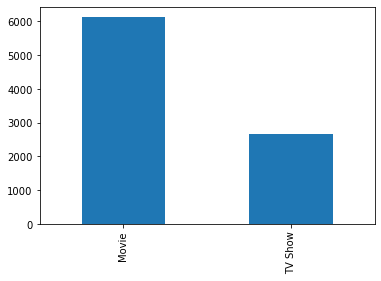

In [4]:
# Check Distribution
print(pd.value_counts(netflix['type']))
pd.value_counts(netflix['type']).plot(kind = 'bar')

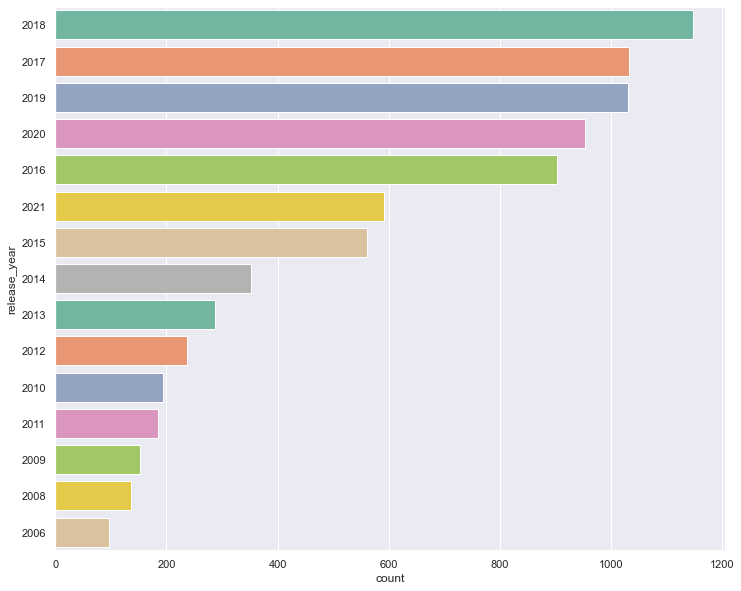

In [94]:
# Year Wise Analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix, palette="Set2", order=netflix['release_year'].value_counts().index[0:15])

<AxesSubplot:title={'center':'The 10 countries with the highest production'}>

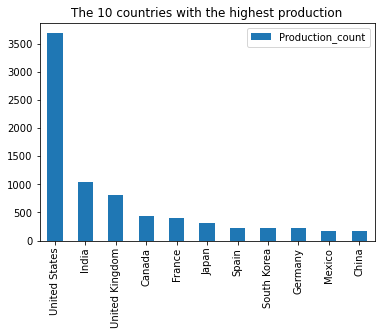

In [46]:
# 10 Highest Movie Producting Countries
countries = {} # To store the counting number

netflix_movies = netflix['country'].dropna() # Remove N/A values
cou=list(netflix_movies)
for i in cou: 
    #print(i)
    i = list(i.split(', '))
    #print(i)
    if len(i) == 1:
        if i[0] in countries.keys():
            countries[i[0]] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

country_count = pd.DataFrame(pd.Series(countries).sort_values(ascending=False), columns = ['Production_count'])
topcountries = country_count[0:11]
topcountries.plot(kind = 'bar', title = 'The 10 countries with the highest production')

array([<AxesSubplot:ylabel='Ratings_count'>], dtype=object)

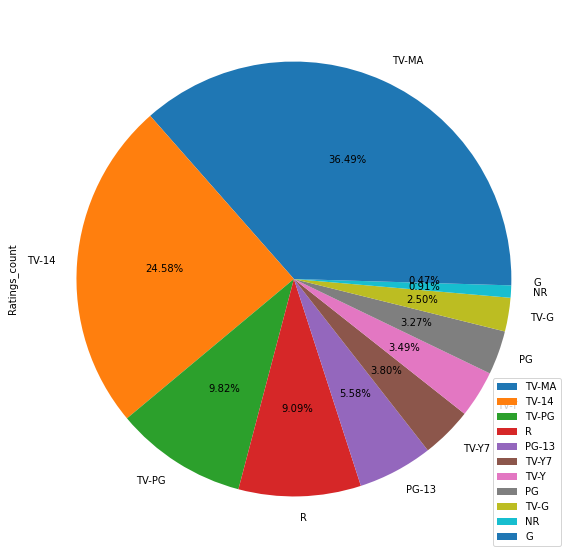

In [87]:
# Top 10 Ratings of Movies And TV-Shows
ratings = {}
netflix_movies_rating = netflix['rating'].dropna()
cou1=list(netflix_movies_rating)
for i in cou1:
    #print(i)
    if i in ratings.keys():
        ratings[i] += 1
    else:
        ratings[i] = 1

ratings_count = pd.DataFrame(pd.Series(ratings).sort_values(ascending=False), columns = ['Ratings_count'])
topratings=ratings_count[0:11]
topratings.plot.pie(subplots = True,figsize = (10,10), autopct = '%.2f%%')

In [44]:
# Split the months and years from the dates
new_netflix_date_list = []
netflix_date = netflix[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split('-')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.split('-')[1])
netflix_date

,date_added,year,month
0,25-Sep-21,21,Sep
1,24-Sep-21,21,Sep
2,24-Sep-21,21,Sep
3,24-Sep-21,21,Sep
4,24-Sep-21,21,Sep
...,...,...,...
8802,20-Nov-19,19,Nov
8803,1-Jul-19,19,Jul
8804,1-Nov-19,19,Nov
8805,11-Jan-20,20,Jan


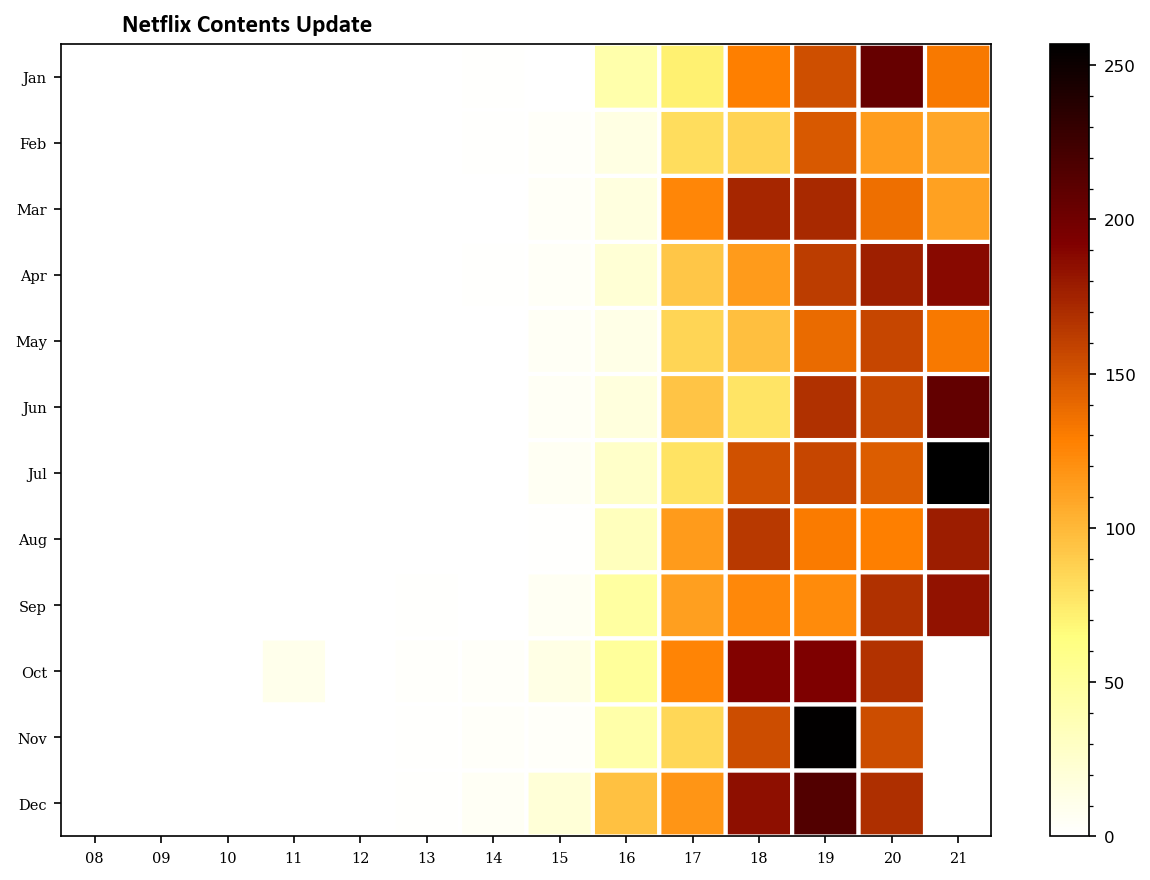

In [66]:
# Get The Heatmap to Show Which Months Is The Best Month For Releasing
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][::-1] # Index
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=150)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()
